<a href="https://colab.research.google.com/github/JerKeller/MP-Ecotaxa/blob/main/DVM_april.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import sys
import subprocess
from plotnine import ggplot, aes, geom_point, geom_line, labs, ggtitle, scale_y_log10
import matplotlib.pyplot as plt
import seaborn as sns
     

from google.colab import drive
     

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
DVM_april = '/content/drive/MyDrive/Ecotaxa_analysis/DVM_april.tsv'
tsv_read = pd.read_csv(DVM_april, sep='\t')
     

In [6]:
sub1 = tsv_read[['object_id','object_time', 'object_depth_min', 'object_depth_max', 'object_annotation_category',
                 'object_area', 'object_area_exc', 'object_major', 'object_minor', 'sample_tot_vol', 'process_particle_pixel_size_mm',
                 'acq_id']]

In [7]:
sub1.columns = ['Label', 'Hour', 'Min_depth', 'Max_depth', 'Taxa', 'area', 'areaExc', 'major', 'minor',
                'Tow_Vol', 'pixel_size_mm', 'acq_id']

In [8]:
sub2 = sub1[(sub1['Taxa'] != 'badfocus<artefact') & (sub1['Taxa'] != 'fiber<detritus') & 
            (sub1['Taxa'] != 'multiple<other') & (sub1['Taxa'] != 'detritus') & 
            (sub1['Taxa'] != 'egg sac<egg') & (sub1['Taxa'] != 't001') & 
            (sub1['Taxa'] != 't002') & (sub1['Taxa'] != 't003') & 
            (sub1['Taxa'] != 'othertocheck') & (sub1['Taxa'] != 'artefact') & 
            (sub1['Taxa'] != 'bubble') & (sub1['Taxa'] != 'dead<Copepoda')].copy()


In [28]:
print(sub2)

            Label    Hour  Min_depth  Max_depth                  Taxa    area  \
0       1_tot_1_1  162300        0.0      100.0  Eudiaptomus gracilis  2290.0   
3       1_tot_1_4  162300        0.0      100.0    Cyclops prealpinus  3472.0   
4       1_tot_1_5  162300        0.0      100.0    Cyclops prealpinus  5298.0   
5       1_tot_1_6  162300        0.0      100.0    Cyclops prealpinus  7710.0   
6       1_tot_1_7  162300        0.0      100.0    Cyclops prealpinus  4553.0   
...           ...     ...        ...        ...                   ...     ...   
28996  9_tot_1_52  184300       60.0       80.0    Cyclops prealpinus  4733.0   
28997  9_tot_1_53  184300       60.0       80.0  Eudiaptomus gracilis  3391.0   
28998  9_tot_1_54  184300       60.0       80.0  Eudiaptomus gracilis  4987.0   
29011  9_tot_1_68  184300       60.0       80.0  Eudiaptomus gracilis  5371.0   
29014  9_tot_1_71  184300       60.0       80.0    Cyclops prealpinus  5543.0   

       areaExc  major  mino

In [9]:
substrat = sub2[~sub2['acq_id'].isin(['tot_32','tot_1','tot_7','tot_13','tot_19','tot_25','tot_31','tot_38','tot_44','tot_50','tot_56'])].copy()

Pixel to mm

In [10]:
substrat['Area_mm2'] = substrat['area'] * ((substrat['pixel_size_mm']) ** 2)
substrat['AreaExc_mm2'] = substrat['areaExc'] * ((substrat['pixel_size_mm']) ** 2)
substrat['Major_mm'] = substrat['major'] * substrat['pixel_size_mm']
substrat['Minor_mm'] = substrat['minor'] * substrat['pixel_size_mm']

In [16]:
substrat['Date'] = pd.to_datetime(substrat['Date'], format='%Y%m%d')

Ellipsoidal Volume = V (mm3) = 4/3 x ∏ x [ (Major(mm)/2) x (Minor(mm)/2) x (Minor(mm)/2) ]

In [11]:
substrat['V_mm3'] = (4 / 3) * np.pi * ((substrat['Major_mm'] / 2) * (substrat['Minor_mm'] / 2) * (substrat['Minor_mm'] / 2))

In [32]:
print(substrat)

             Label    Hour  Min_depth  Max_depth                  Taxa  \
1850    10_tot_1_2  185400       40.0       60.0  Eudiaptomus gracilis   
1855    10_tot_1_7  185400       40.0       60.0  Eudiaptomus gracilis   
1857    10_tot_1_9  185400       40.0       60.0    Cyclops prealpinus   
1860   10_tot_1_12  185400       40.0       60.0    Cyclops prealpinus   
1862   10_tot_1_14  185400       40.0       60.0      nauplii<Copepoda   
...            ...     ...        ...        ...                   ...   
28996   9_tot_1_52  184300       60.0       80.0    Cyclops prealpinus   
28997   9_tot_1_53  184300       60.0       80.0  Eudiaptomus gracilis   
28998   9_tot_1_54  184300       60.0       80.0  Eudiaptomus gracilis   
29011   9_tot_1_68  184300       60.0       80.0  Eudiaptomus gracilis   
29014   9_tot_1_71  184300       60.0       80.0    Cyclops prealpinus   

         area  areaExc  major  minor  Tow_Vol  pixel_size_mm  acq_id  \
1850   4824.0   4809.0  131.9   46.6   

In [32]:
tot_2 = substrat[substrat['acq_id'] == 'tot_2']
tot_3 = substrat[substrat['acq_id'] == 'tot_3']
tot_4 = substrat[substrat['acq_id'] == 'tot_4']
tot_5 = substrat[substrat['acq_id'] == 'tot_5']
tot_6 = substrat[substrat['acq_id'] == 'tot_6']
tot_8 = substrat[substrat['acq_id'] == 'tot_8']
tot_9 = substrat[substrat['acq_id'] == 'tot_9']
tot_10 = substrat[substrat['acq_id'] == 'tot_10']
tot_11 = substrat[substrat['acq_id'] == 'tot_11']
tot_12 = substrat[substrat['acq_id'] == 'tot_12']
tot_14 = substrat[substrat['acq_id'] == 'tot_14']
tot_15 = substrat[substrat['acq_id'] == 'tot_15']
tot_16 = substrat[substrat['acq_id'] == 'tot_16']
tot_17 = substrat[substrat['acq_id'] == 'tot_17']
tot_18 = substrat[substrat['acq_id'] == 'tot_18']
tot_20 = substrat[substrat['acq_id'] == 'tot_20']
tot_21 = substrat[substrat['acq_id'] == 'tot_21']
tot_22 = substrat[substrat['acq_id'] == 'tot_22']
tot_23 = substrat[substrat['acq_id'] == 'tot_23']
tot_24 = substrat[substrat['acq_id'] == 'tot_24']
tot_26 = substrat[substrat['acq_id'] == 'tot_26']
tot_27 = substrat[substrat['acq_id'] == 'tot_27']
tot_28 = substrat[substrat['acq_id'] == 'tot_28']
tot_29 = substrat[substrat['acq_id'] == 'tot_29']
tot_30 = substrat[substrat['acq_id'] == 'tot_30']
tot_33 = substrat[substrat['acq_id'] == 'tot_33']
tot_34 = substrat[substrat['acq_id'] == 'tot_34']
tot_35 = substrat[substrat['acq_id'] == 'tot_35']
tot_36 = substrat[substrat['acq_id'] == 'tot_36']
tot_37 = substrat[substrat['acq_id'] == 'tot_37']
tot_39 = substrat[substrat['acq_id'] == 'tot_39']
tot_40 = substrat[substrat['acq_id'] == 'tot_40']
tot_41 = substrat[substrat['acq_id'] == 'tot_41']
tot_42 = substrat[substrat['acq_id'] == 'tot_42']
tot_43 = substrat[substrat['acq_id'] == 'tot_43']
tot_45 = substrat[substrat['acq_id'] == 'tot_45']
tot_46 = substrat[substrat['acq_id'] == 'tot_46']
tot_47 = substrat[substrat['acq_id'] == 'tot_47']
tot_48 = substrat[substrat['acq_id'] == 'tot_48']
tot_49 = substrat[substrat['acq_id'] == 'tot_49']
tot_51 = substrat[substrat['acq_id'] == 'tot_51']
tot_52 = substrat[substrat['acq_id'] == 'tot_52']
tot_53 = substrat[substrat['acq_id'] == 'tot_53']
tot_54 = substrat[substrat['acq_id'] == 'tot_54']
tot_55 = substrat[substrat['acq_id'] == 'tot_55']
tot_57 = substrat[substrat['acq_id'] == 'tot_57']
tot_58 = substrat[substrat['acq_id'] == 'tot_58']
tot_59 = substrat[substrat['acq_id'] == 'tot_59']
tot_60 = substrat[substrat['acq_id'] == 'tot_60']
tot_61 = substrat[substrat['acq_id'] == 'tot_61']

In [33]:
profile_1 = pd.concat([tot_2, tot_3, tot_4, tot_5, tot_6], ignore_index=True)
profile_2 = pd.concat([tot_8, tot_9, tot_10, tot_11, tot_12], ignore_index=True)
profile_3 = pd.concat([tot_14, tot_15, tot_16, tot_17, tot_18], ignore_index=True)
profile_4 = pd.concat([tot_20, tot_21, tot_22, tot_23, tot_24], ignore_index=True)
profile_5 = pd.concat([tot_26, tot_27, tot_28, tot_29, tot_30], ignore_index=True)
profile_6 = pd.concat([tot_33, tot_34, tot_35, tot_36, tot_37], ignore_index=True)
profile_7 = pd.concat([tot_39, tot_40, tot_41, tot_42, tot_43], ignore_index=True)
profile_8 = pd.concat([tot_45, tot_46, tot_47, tot_48, tot_49], ignore_index=True)
profile_9 = pd.concat([tot_51, tot_52, tot_53, tot_54, tot_55], ignore_index=True)
profile_10 = pd.concat([tot_57, tot_58, tot_59, tot_60, tot_61], ignore_index=True)

In [18]:
# Pour le profil 1
profile_1_count = profile_1.groupby('Taxa').size().reset_index(name='Count')
print("Nombre d'individus par espèce pour le profil 1:")
print(profile_1_count)

# Pour le profil 2
profile_2_count = profile_2.groupby('Taxa').size().reset_index(name='Count')
print("\nNombre d'individus par espèce pour le profil 2:")
print(profile_2_count)

Nombre d'individus par espèce pour le profil 1:
                      Taxa  Count
0  Bythotrephes longimanus      1
1       Cyclops prealpinus    353
2       Daphnia<Daphniidae      4
3     Eudiaptomus gracilis    631
4         nauplii<Copepoda     91

Nombre d'individus par espèce pour le profil 2:
                   Taxa  Count
0    Cyclops prealpinus    375
1          Eubosmina sp      1
2  Eudiaptomus gracilis    429
3      nauplii<Copepoda     79


In [ ]:
species = profile_1['Taxa'].unique()

for sp in species:
    species_data = profile_1[profile_1['Taxa'] == sp]
    
    # Calculate the average depth for each individual using .loc[]
    species_data.loc[:, 'Avg_depth'] = (species_data['Min_depth'] + species_data['Max_depth']) / 2
    
    # Filter data to only include values with Avg_depth less than or equal to 100
    species_data = species_data[species_data['Avg_depth'] <= 100]
    
    # Plot the 2D KDE with a colorbar
    plt.figure(figsize=(6, 6))
    sns.kdeplot(x=species_data['V_mm3'], y=species_data['Avg_depth'], fill=True, cmap='coolwarm', thresh=0, levels=100, cbar=True)
    
    
    plt.title(f'Kernel Density Plot for {sp} - Profile 1')
    plt.xlabel('Individual Volume (mm³)')
    plt.ylabel('Average Depth (m)')
    plt.gca().invert_yaxis()  # Invert y-axis to show depth from top to bottom
    plt.show()

<ipython-input-22-d50bc16dd19d>:13: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.


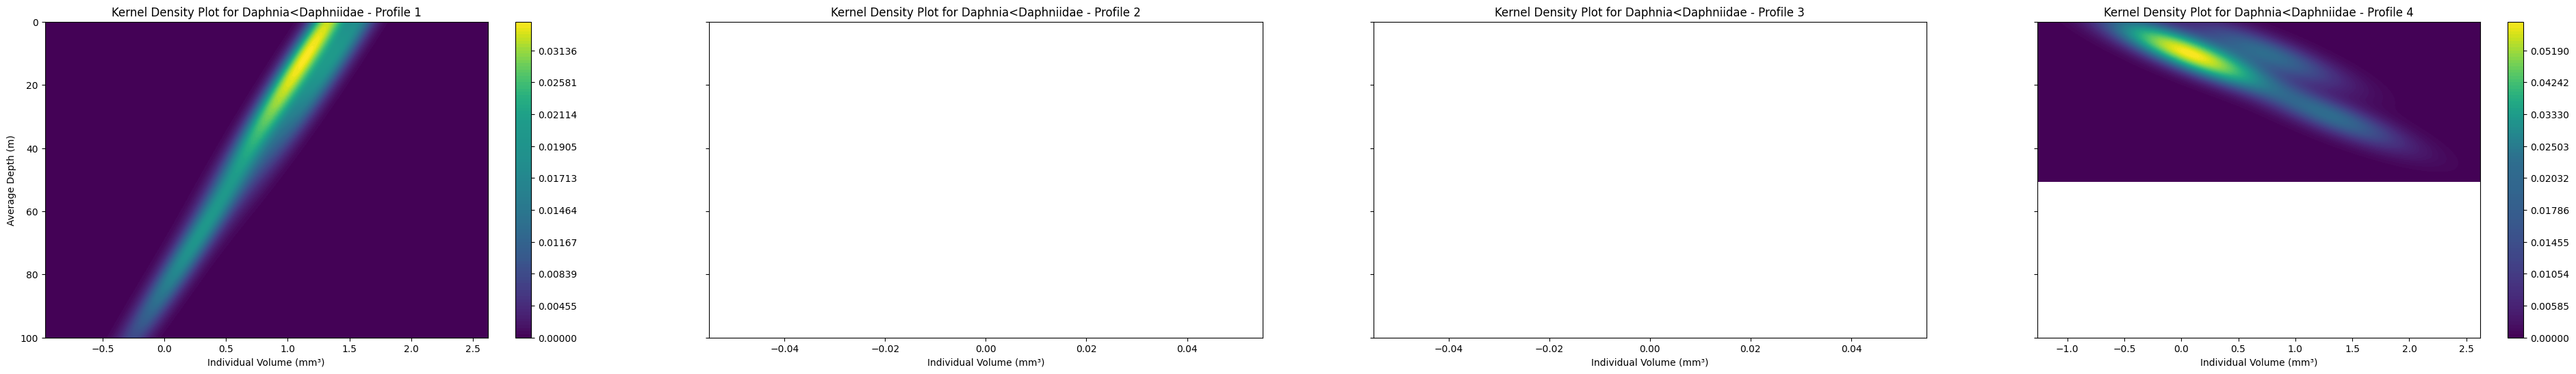

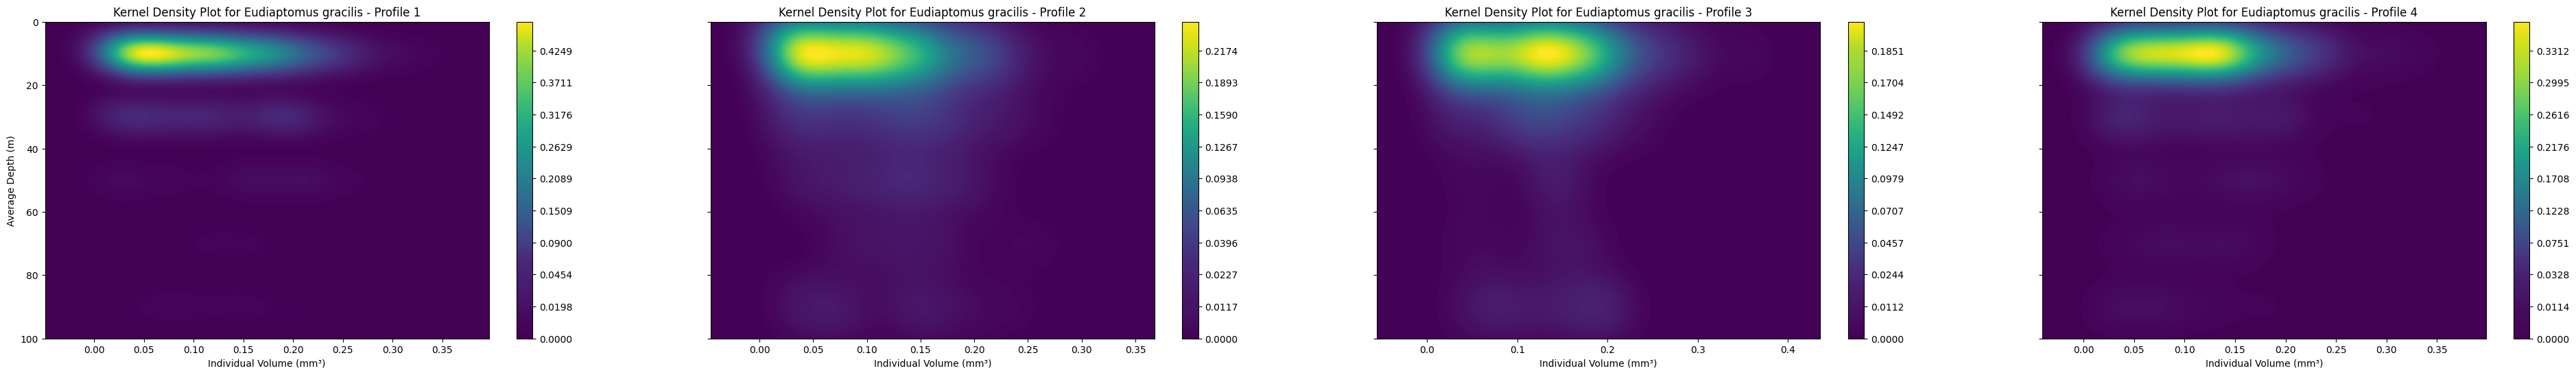

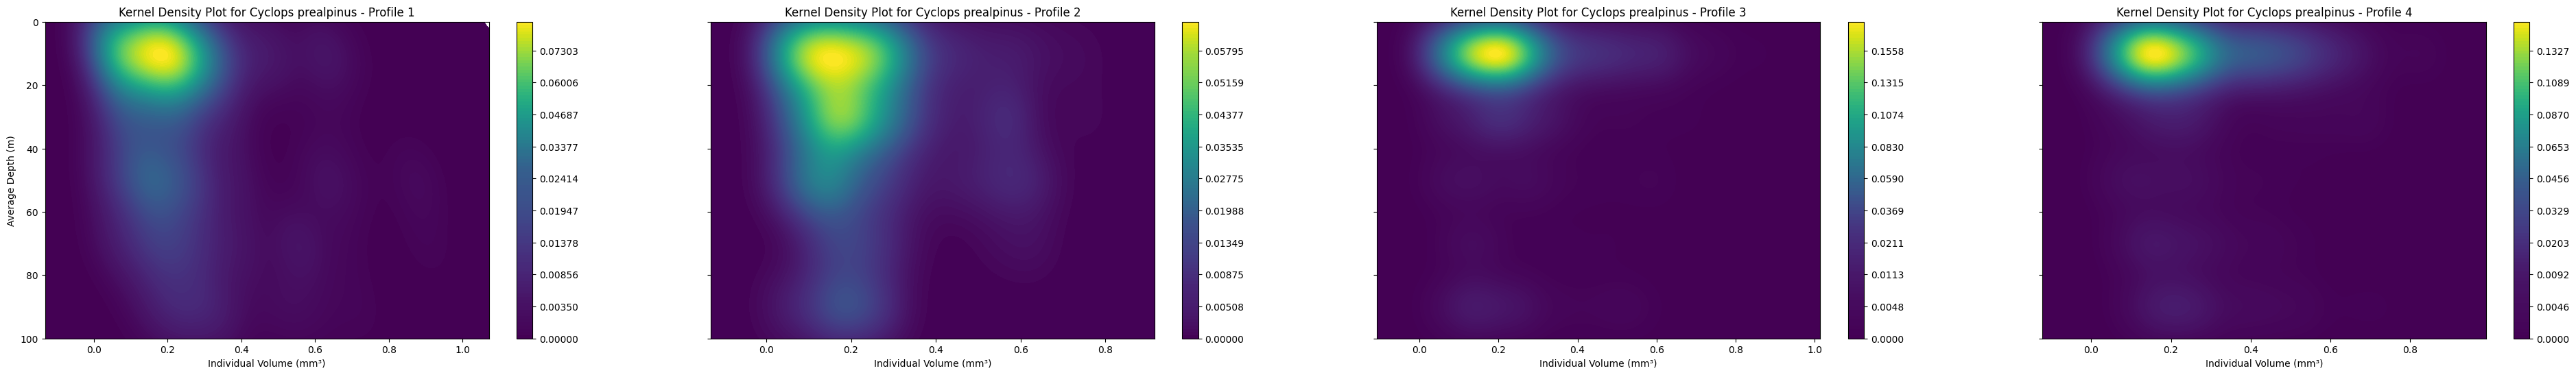

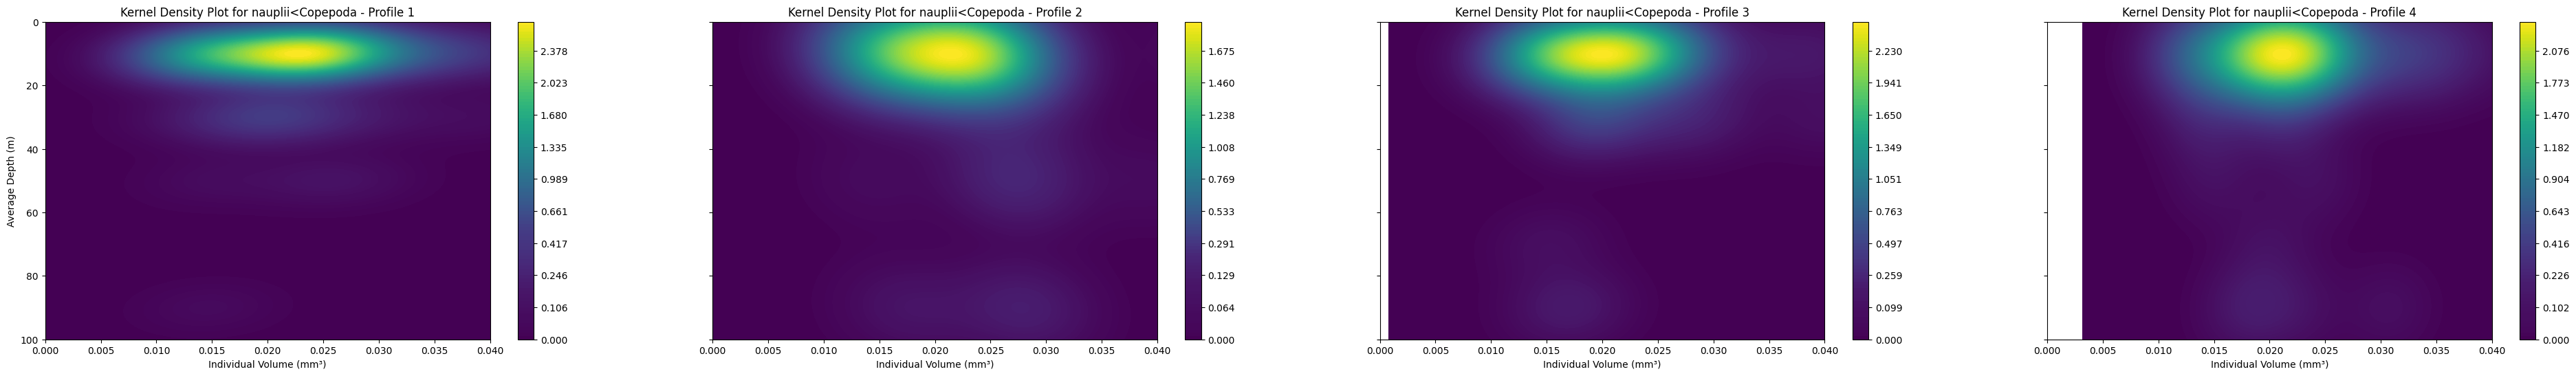

<ipython-input-22-d50bc16dd19d>:13: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
<ipython-input-22-d50bc16dd19d>:13: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
<ipython-input-22-d50bc16dd19d>:13: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.


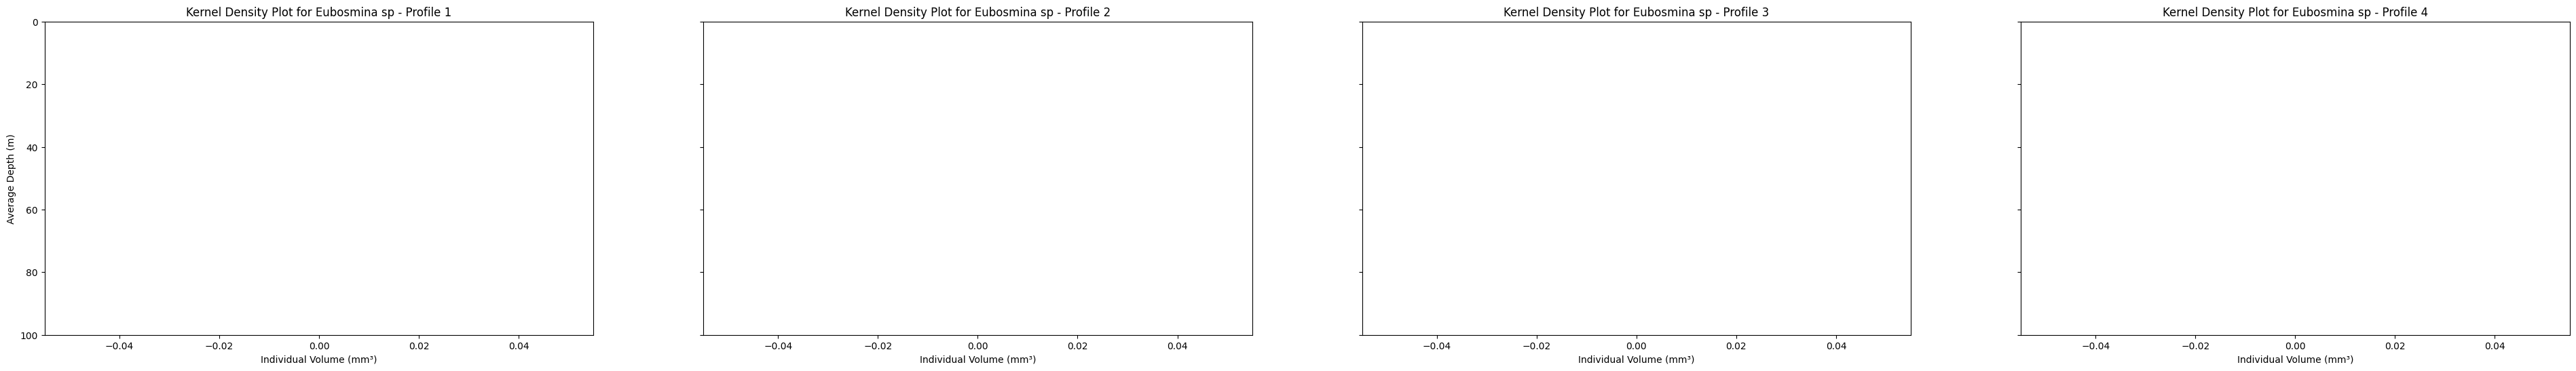

<ipython-input-22-d50bc16dd19d>:13: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
<ipython-input-22-d50bc16dd19d>:13: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.


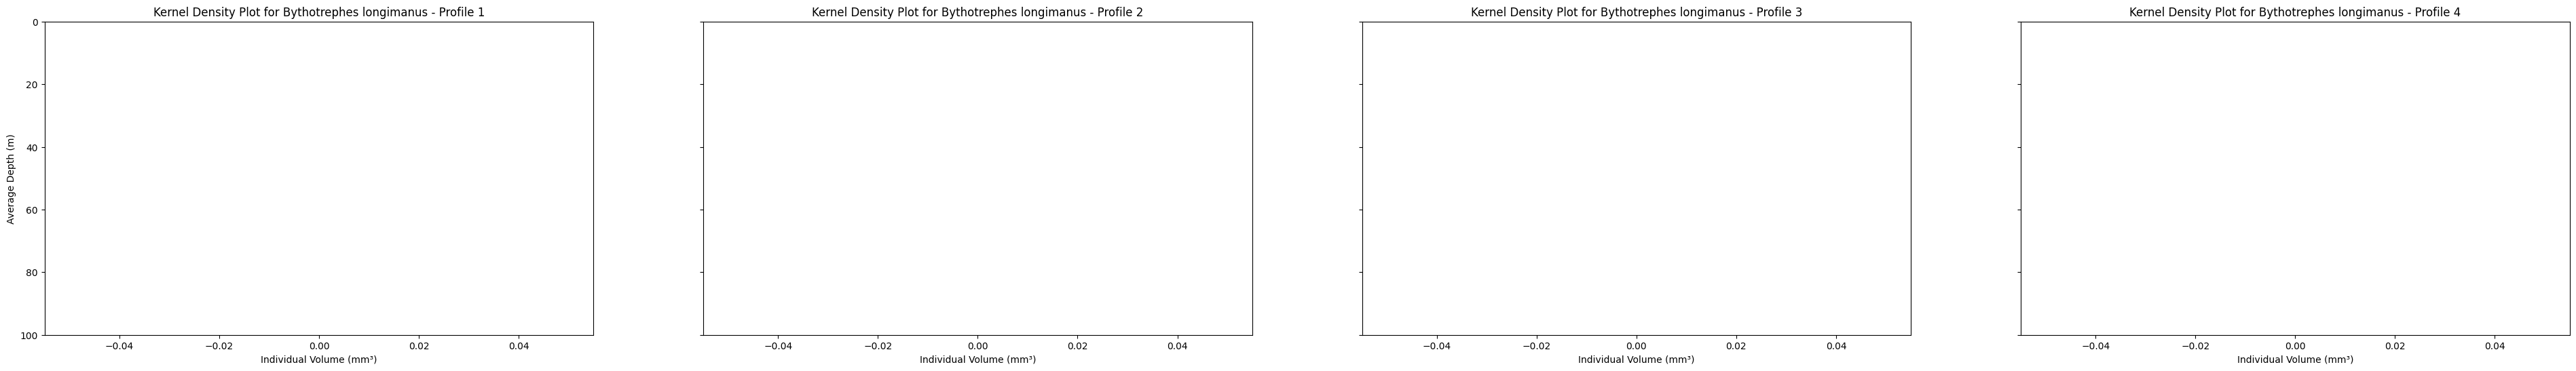

In [22]:
# Get unique species for all profiles
species = set(profile_1['Taxa'].unique()).union(set(profile_2['Taxa'].unique()), set(profile_3['Taxa'].unique()), set(profile_4['Taxa'].unique()))

for sp in species:
    fig, axes = plt.subplots(1, 4, figsize=(48, 6), sharey=True)  # Changez 1, 2 en 1, 4 pour ajouter deux subplots supplémentaires

    for idx, profile in enumerate([profile_1, profile_2, profile_3, profile_4]):  # Ajoutez profile_3 et profile_4 à la liste
        species_data = profile[profile['Taxa'] == sp].copy()
        species_data['Avg_depth'] = (species_data['Min_depth'] + species_data['Max_depth']) / 2
        species_data = species_data[(species_data['Avg_depth'] >= 0) & (species_data['Avg_depth'] <= 100)]

        # Plot the 2D KDE with a colorbar on the appropriate subplot
        sns.kdeplot(x=species_data['V_mm3'], y=species_data['Avg_depth'], fill=True, cmap='viridis', thresh=0, levels=100, cbar=True, ax=axes[idx])

        # Set x-axis limits for specific species
        if sp == 'nauplii<Copepoda':
            axes[idx].set_xlim(0, 0.04)
        elif sp == 'Daphnia':
            axes[idx].set_xlim(0, 0.4)

        axes[idx].set_title(f'Kernel Density Plot for {sp} - Profile {idx+1}')
        axes[idx].set_xlabel('Individual Volume (mm³)')
        axes[idx].invert_yaxis()  # Invert y-axis to show depth from top to bottom
        axes[idx].set_ylim(100, 0)  # Set y-axis limits to show only depths between 0 and 100m

    # Set the shared y-axis label
    axes[0].set_ylabel('Average Depth (m)')
    plt.show()


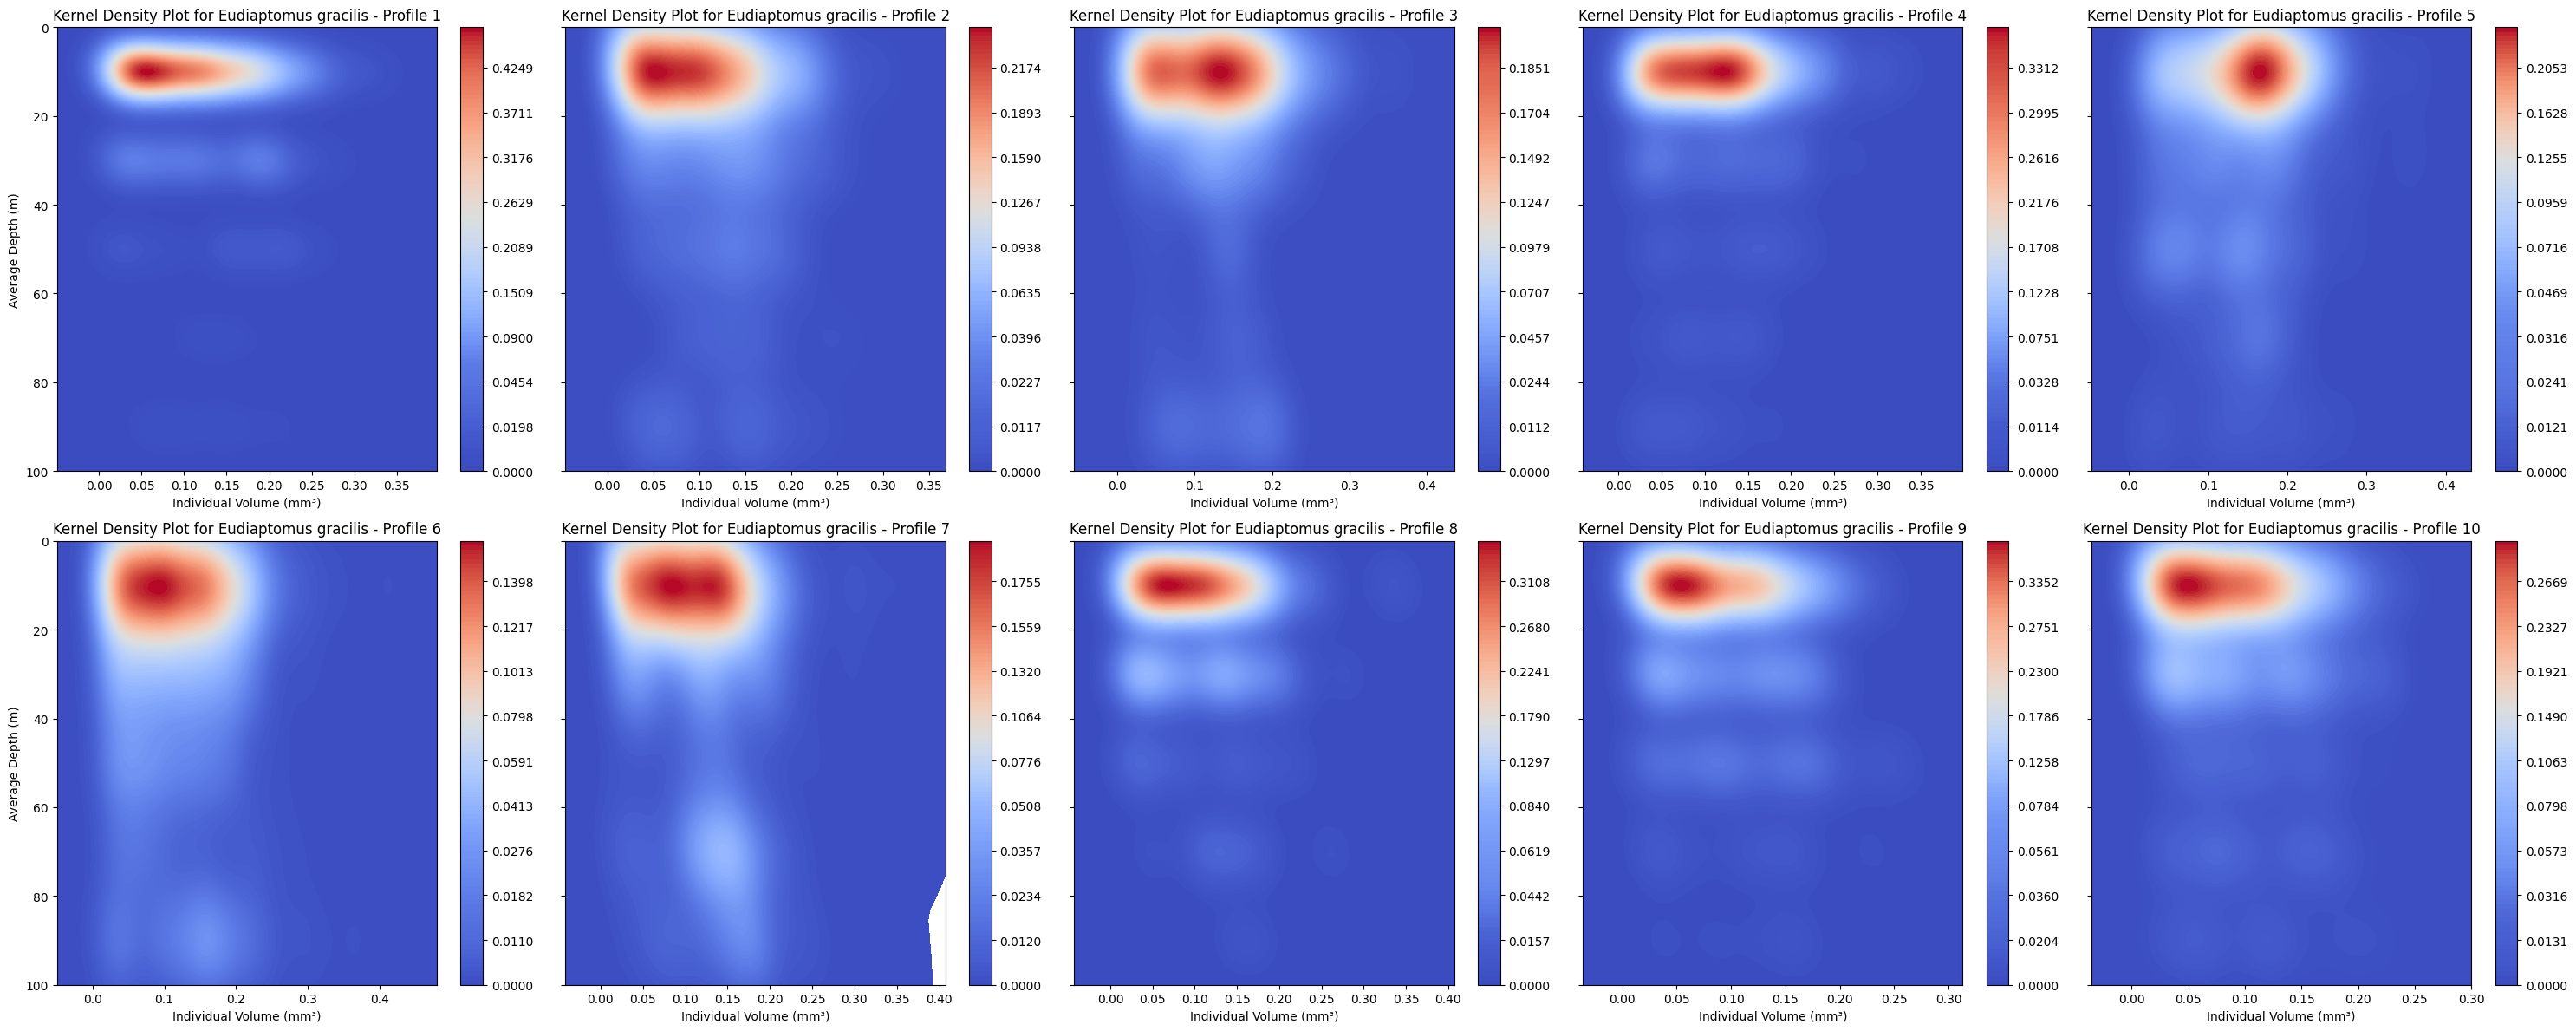

In [34]:
# Set the target species
target_species = "Eudiaptomus gracilis"

# Create a list of all profiles
profiles = [profile_1, profile_2, profile_3, profile_4, profile_5, profile_6, profile_7, profile_8, profile_9, profile_10]

# Define the number of profiles and rows
num_profiles = len(profiles)
num_rows = 2
num_columns = num_profiles // num_rows

# Create the figure and subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(6 * num_columns, 6 * num_rows), sharey=True)

for idx, profile in enumerate(profiles):
    row = idx // num_columns
    col = idx % num_columns
    
    species_data = profile[profile['Taxa'] == target_species].copy()
    species_data['Avg_depth'] = (species_data['Min_depth'] + species_data['Max_depth']) / 2
    species_data = species_data[(species_data['Avg_depth'] >= 0) & (species_data['Avg_depth'] <= 100)]
    
    # Plot the 2D KDE with a colorbar on the appropriate subplot
    sns.kdeplot(x=species_data['V_mm3'], y=species_data['Avg_depth'], fill=True, cmap='coolwarm', thresh=0, levels=100, cbar=True, ax=axes[row, col])
    
    axes[row, col].set_title(f'Kernel Density Plot for {target_species} - Profile {idx+1}')
    axes[row, col].set_xlabel('Individual Volume (mm³)')
    axes[row, col].invert_yaxis()  # Invert y-axis to show depth from top to bottom
    axes[row, col].set_ylim(100, 0)  # Set y-axis limits to show only depths between 0 and 100m

# Set the shared y-axis label
axes[0, 0].set_ylabel('Average Depth (m)')
axes[1, 0].set_ylabel('Average Depth (m)')
plt.tight_layout()
plt.show()


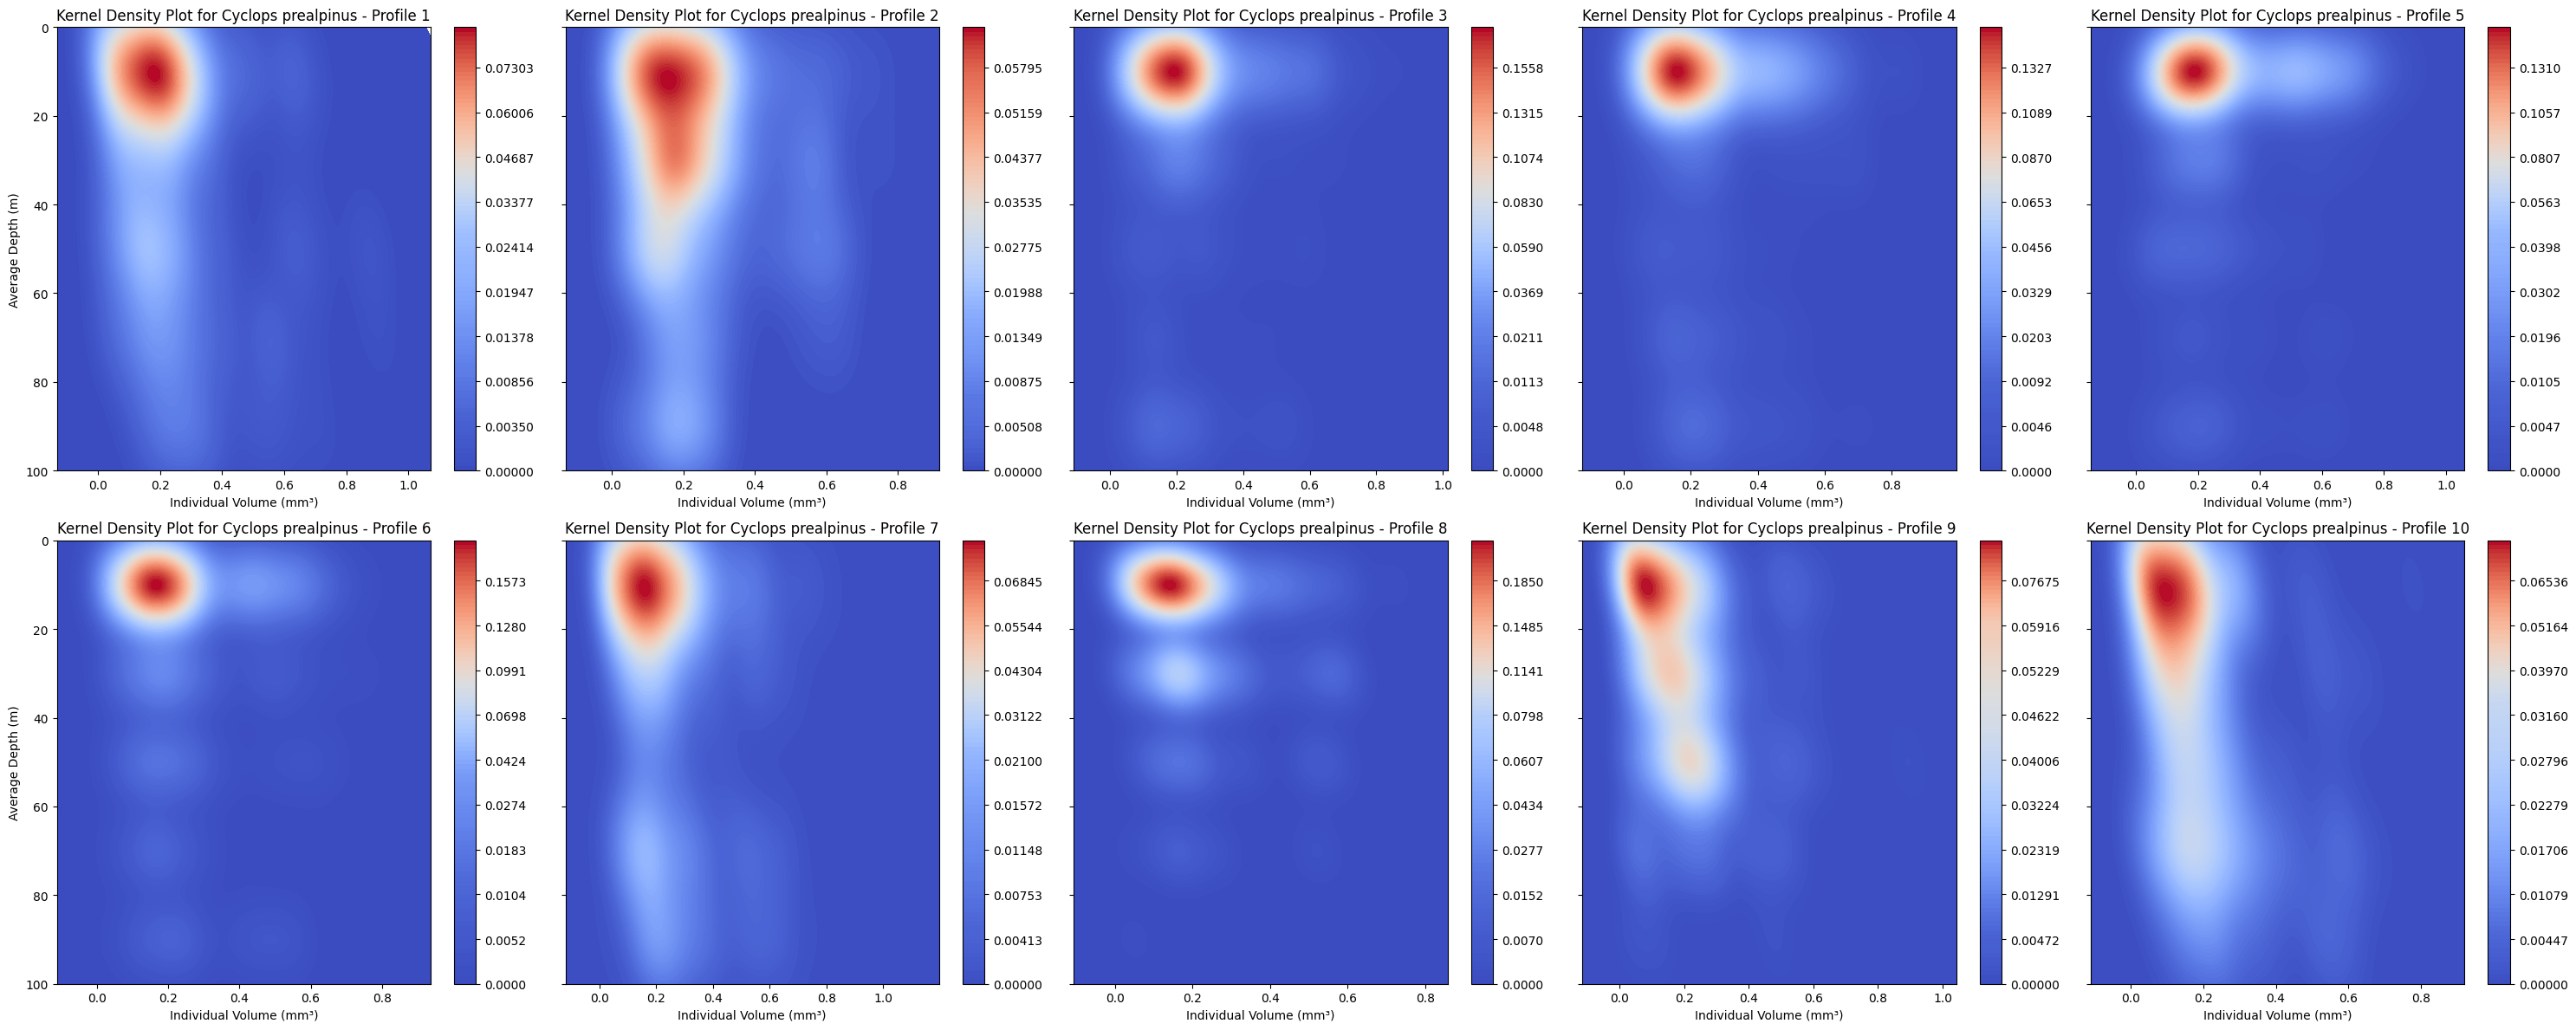

In [35]:
# Set the target species
target_species = "Cyclops prealpinus"

# Create a list of all profiles
profiles = [profile_1, profile_2, profile_3, profile_4, profile_5, profile_6, profile_7, profile_8, profile_9, profile_10]

# Define the number of profiles and rows
num_profiles = len(profiles)
num_rows = 2
num_columns = num_profiles // num_rows

# Create the figure and subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(6 * num_columns, 6 * num_rows), sharey=True)

for idx, profile in enumerate(profiles):
    row = idx // num_columns
    col = idx % num_columns
    
    species_data = profile[profile['Taxa'] == target_species].copy()
    species_data['Avg_depth'] = (species_data['Min_depth'] + species_data['Max_depth']) / 2
    species_data = species_data[(species_data['Avg_depth'] >= 0) & (species_data['Avg_depth'] <= 100)]
    
    # Plot the 2D KDE with a colorbar on the appropriate subplot
    sns.kdeplot(x=species_data['V_mm3'], y=species_data['Avg_depth'], fill=True, cmap='coolwarm', thresh=0, levels=100, cbar=True, ax=axes[row, col])
    
    axes[row, col].set_title(f'Kernel Density Plot for {target_species} - Profile {idx+1}')
    axes[row, col].set_xlabel('Individual Volume (mm³)')
    axes[row, col].invert_yaxis()  # Invert y-axis to show depth from top to bottom
    axes[row, col].set_ylim(100, 0)  # Set y-axis limits to show only depths between 0 and 100m

# Set the shared y-axis label
axes[0, 0].set_ylabel('Average Depth (m)')
axes[1, 0].set_ylabel('Average Depth (m)')
plt.tight_layout()
plt.show()

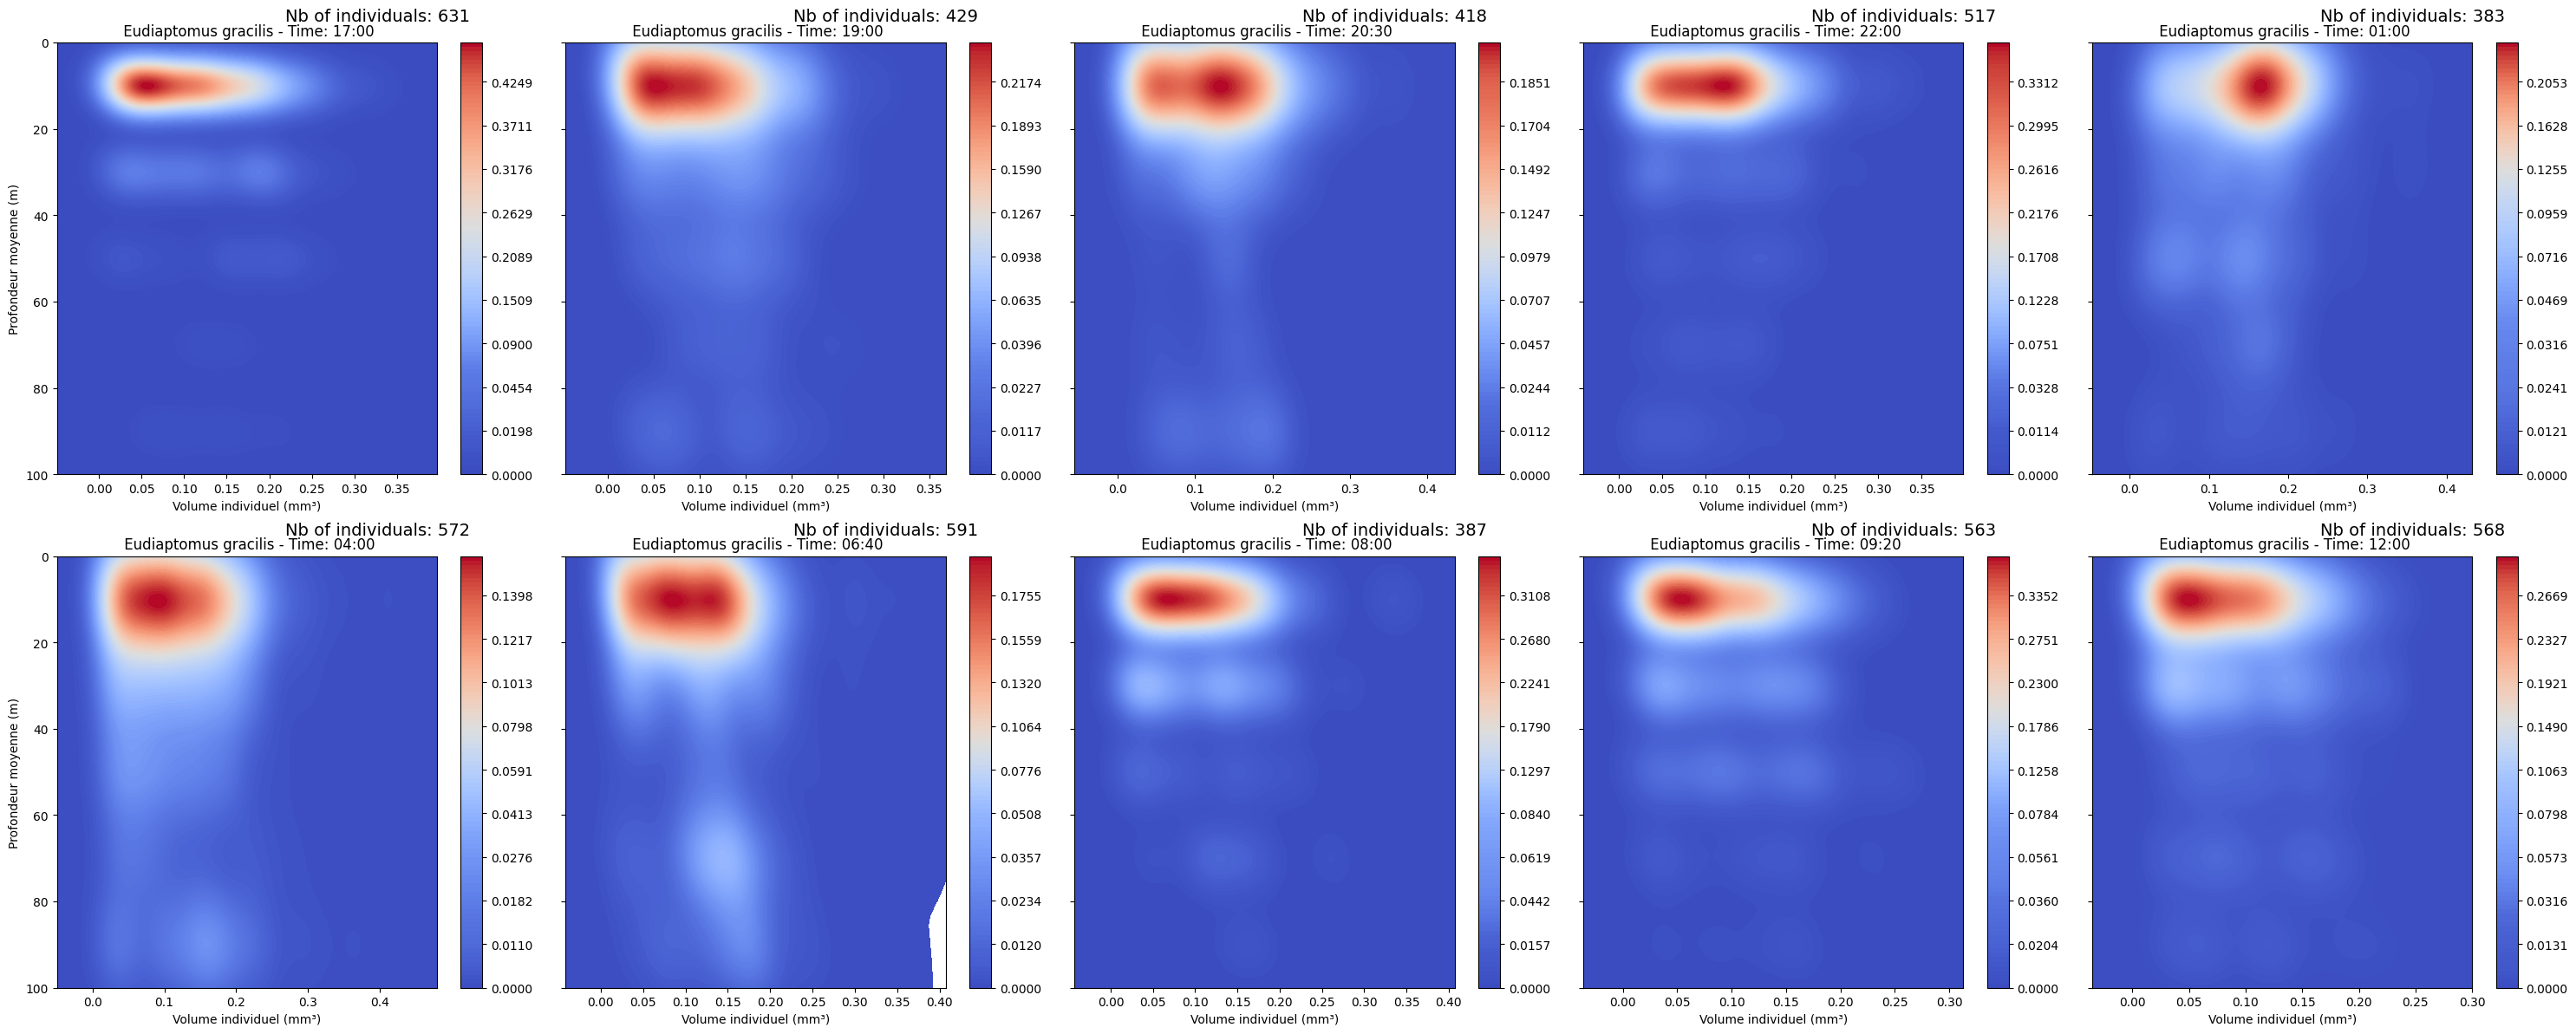

In [46]:

# Ajoutez vos heures pour chaque profil dans l'ordre
hours = ['17:00', '19:00', '20:30', '22:00', '01:00', '04:00', '06:40', '08:00', '09:20', '12:00']

# Filtrez les données pour ne garder que l'espèce Eudiaptomus gracilis
sp = 'Eudiaptomus gracilis'
species_data_all_profiles = [profile[profile['Taxa'] == sp] for profile in profiles]

# Créez les sous-graphiques
fig, axes = plt.subplots(2, 5, figsize=(30, 12), sharey=True)
axes = axes.flatten()
for idx, (hour, species_data) in enumerate(zip(hours, species_data_all_profiles)):
    species_data = species_data.copy()  # Ajoutez cette ligne pour créer une copie
    species_data['Avg_depth'] = (species_data['Min_depth'] + species_data['Max_depth']) / 2
    species_data = species_data[(species_data['Avg_depth'] >= 0) & (species_data['Avg_depth'] <= 100)]


    # Tracez le KDE 2D avec une barre de couleur sur le sous-tracé approprié
    sns.kdeplot(x=species_data['V_mm3'], y=species_data['Avg_depth'], fill=True, cmap='coolwarm', thresh=0, levels=100, cbar=True, ax=axes[idx])

    # Ajoutez le nombre total d'individus dans le graphique
    num_individuals = len(species_data)
    axes[idx].text(0.6, 1.05, f'Nb of individuals: {num_individuals}', transform=axes[idx].transAxes, fontsize=14)

    axes[idx].set_title(f' {sp} - Time: {hour}')
    axes[idx].set_xlabel('Volume individuel (mm³)')
    axes[idx].invert_yaxis()  # Inverser l'axe des y pour montrer la profondeur de haut en bas
    axes[idx].set_ylim(100, 0)  # Définir les limites de l'axe des y pour montrer uniquement les profondeurs entre 0 et 100m

# Définir le libellé de l'axe des y partagé
axes[0].set_ylabel('Profondeur moyenne (m)')
axes[5].set_ylabel('Profondeur moyenne (m)')
plt.tight_layout()
plt.show()

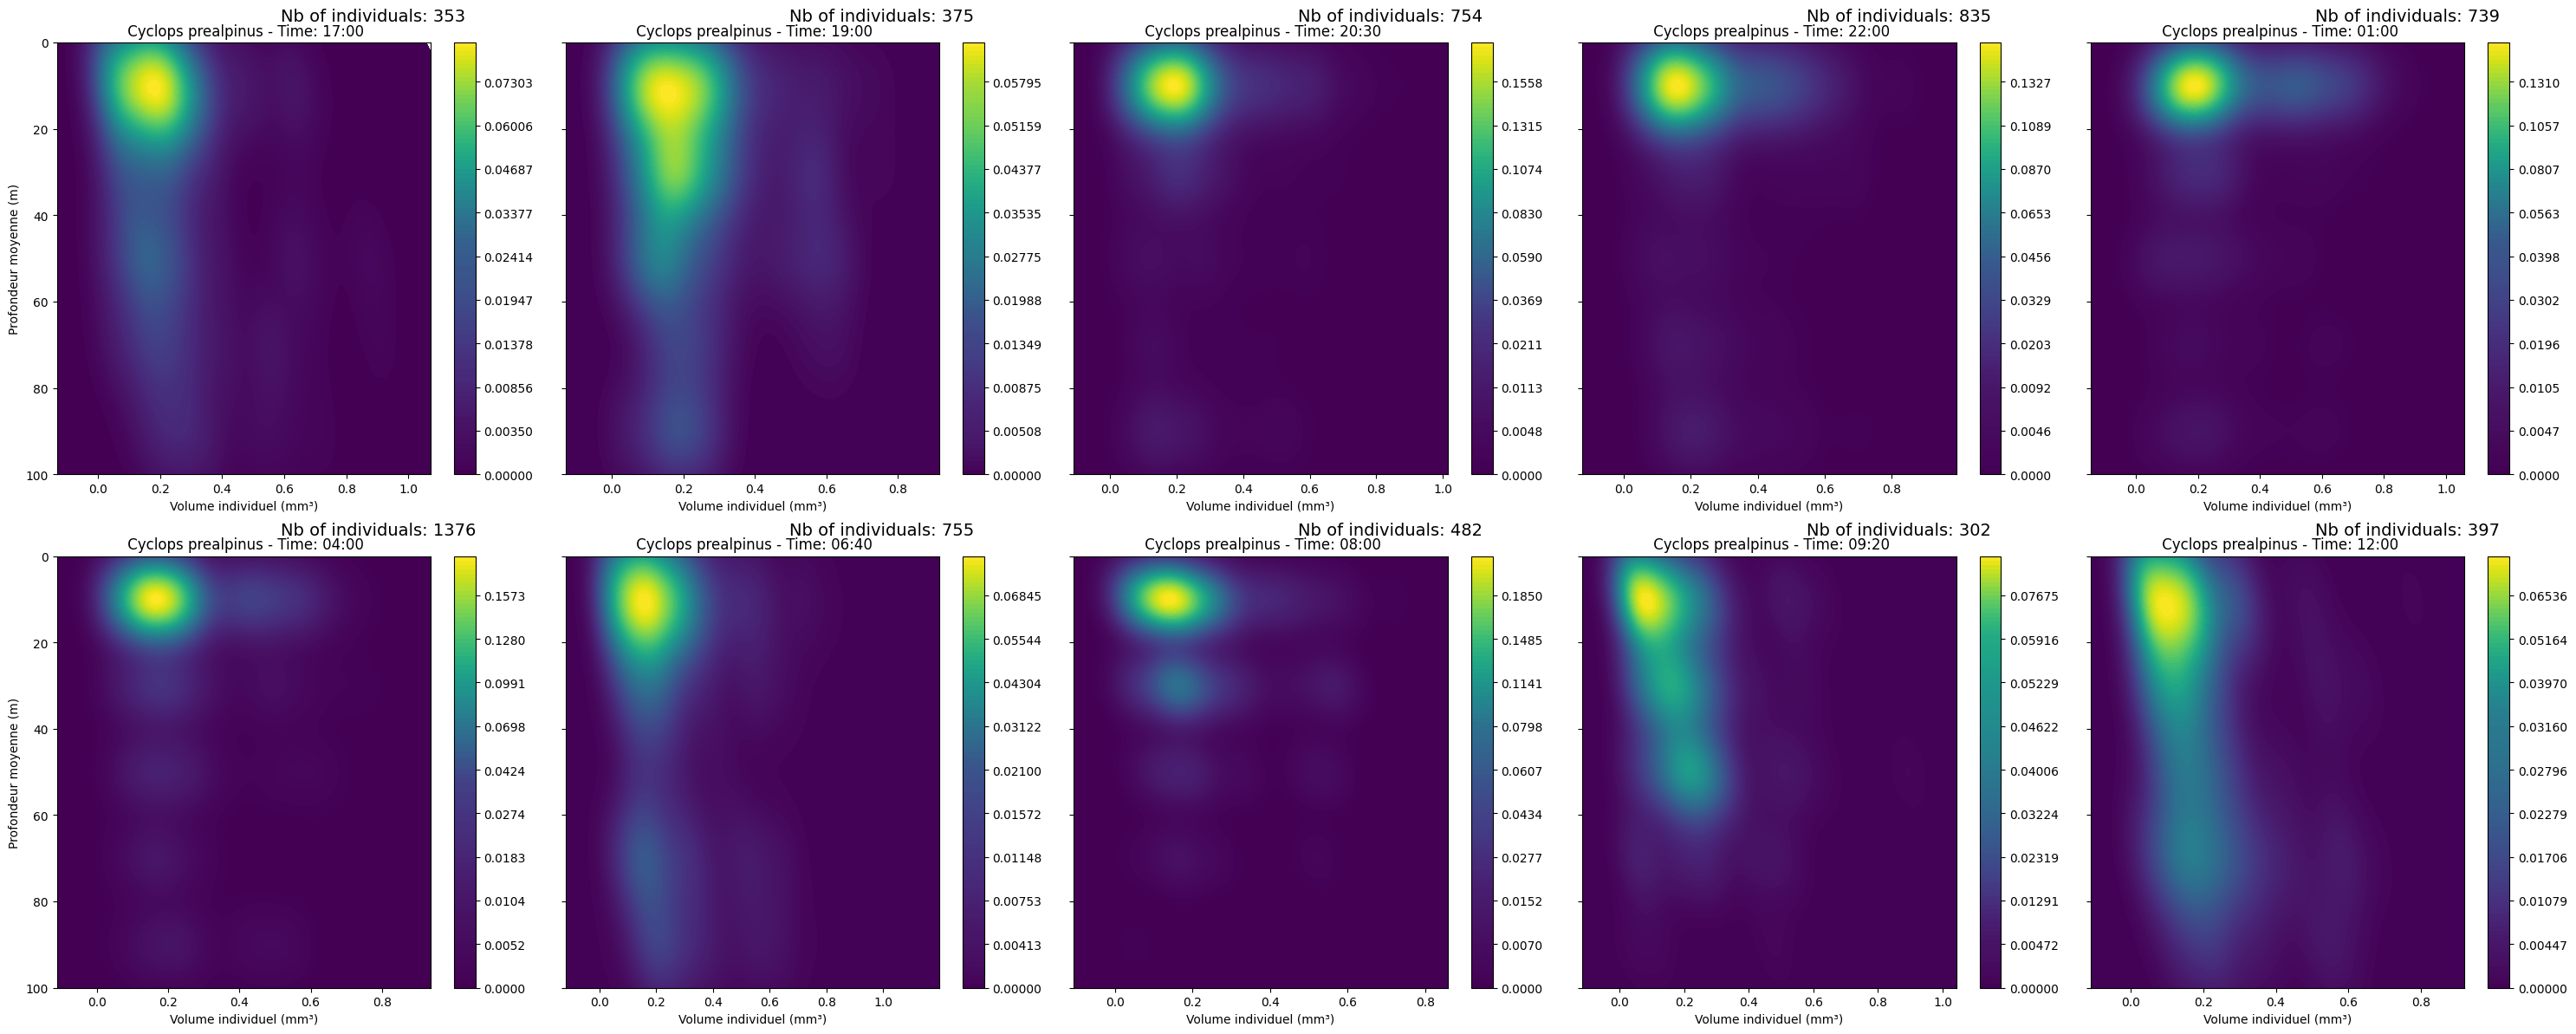

In [45]:
# Ajoutez vos heures pour chaque profil dans l'ordre
hours = ['17:00', '19:00', '20:30', '22:00', '01:00', '04:00', '06:40', '08:00', '09:20', '12:00']

# Filtrez les données pour ne garder que l'espèce Eudiaptomus gracilis
sp = 'Cyclops prealpinus'
species_data_all_profiles = [profile[profile['Taxa'] == sp] for profile in profiles]

# Créez les sous-graphiques
fig, axes = plt.subplots(2, 5, figsize=(30, 12), sharey=True)
axes = axes.flatten()
for idx, (hour, species_data) in enumerate(zip(hours, species_data_all_profiles)):
    species_data = species_data.copy()  # Ajoutez cette ligne pour créer une copie
    species_data['Avg_depth'] = (species_data['Min_depth'] + species_data['Max_depth']) / 2
    species_data = species_data[(species_data['Avg_depth'] >= 0) & (species_data['Avg_depth'] <= 100)]


    # Tracez le KDE 2D avec une barre de couleur sur le sous-tracé approprié
    sns.kdeplot(x=species_data['V_mm3'], y=species_data['Avg_depth'], fill=True, cmap='viridis', thresh=0, levels=100, cbar=True, ax=axes[idx])

    # Ajoutez le nombre total d'individus dans le graphique
    num_individuals = len(species_data)
    axes[idx].text(0.6, 1.05, f'Nb of individuals: {num_individuals}', transform=axes[idx].transAxes, fontsize=14)

    axes[idx].set_title(f' {sp} - Time: {hour}')
    axes[idx].set_xlabel('Volume individuel (mm³)')
    axes[idx].invert_yaxis()  # Inverser l'axe des y pour montrer la profondeur de haut en bas
    axes[idx].set_ylim(100, 0)  # Définir les limites de l'axe des y pour montrer uniquement les profondeurs entre 0 et 100m

# Définir le libellé de l'axe des y partagé
axes[0].set_ylabel('Profondeur moyenne (m)')
axes[5].set_ylabel('Profondeur moyenne (m)')
plt.tight_layout()
plt.show()